<a href="https://colab.research.google.com/github/gouravAtre/SentimentAnalyser/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing twitter dataset**

In [ ]:
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/sentiment140-subset.csv.zip -P data
!unzip -n -d data data/sentiment140-subset.csv.zip

--2022-04-12 17:01:08--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/sentiment140-subset.csv.zip
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17927149 (17M) [application/zip]
Saving to: ‘data/sentiment140-subset.csv.zip’

sentiment140-subset 100%[===================>]  17.10M  74.3MB/s    in 0.2s    

2022-04-12 17:01:09 (74.3 MB/s) - ‘data/sentiment140-subset.csv.zip’ saved [17927149/17927149]

Archive:  data/sentiment140-subset.csv.zip
  inflating: data/sentiment140-subset.csv  


**Load the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud
import re

In [ ]:
df = pd.read_csv("data/sentiment140-subset.csv", nrows=30000)
df.head()

,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was ..."
3,1,Wii fit says I've lost 10 pounds since last ti...
4,0,@MrKinetik Not a thing!!! I don't really have...


In [ ]:
print(df.shape)
df.polarity.value_counts()

(30000, 2)


1    15064
0    14936
Name: polarity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


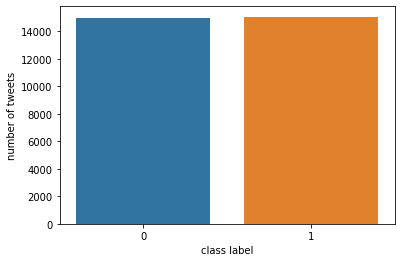

In [ ]:
# Graphical Representation
sns.countplot(df.polarity)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

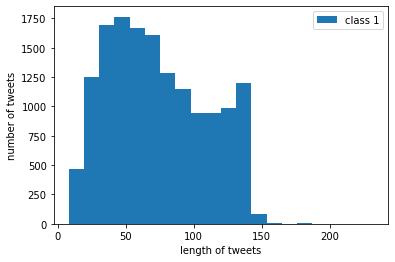

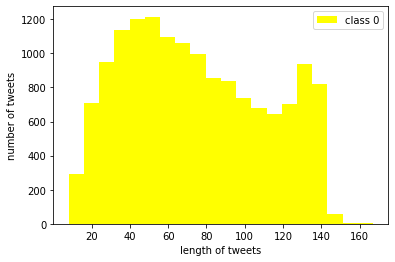

In [ ]:
plt.hist(df[df['polarity']==1].text.str.len(),bins=20,label='class 1')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()
plt.hist(df[df['polarity']==0].text.str.len(),color='yellow',bins=20,label='class 0')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()

**Preprocessing the Dataset**
1. Removing Twitter Handles (@user)

2. Removing urls from text

3. Removing Punctuations, Numbers, and Special Characters

4. Convert the word to lowercase

5. Remove Stopwords

6. Stemming the word

7. Lemmatization

**Stopword Removal**

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords

In [21]:
stopword=nltk.corpus.stopwords.words('english')

for index,text_ in enumerate(df.text):
    text_=re.sub(r'@[\w]*','',text_) #Removing Twitter Handles (@user)
    text_=re.sub(r'http/S+','',text_) #Removing urls from text 
    text_=re.sub(r'[^A-Za-z#]',' ',text_) #Removing Punctuations, Numbers, and Special Characters
    text_=" ".join(i.lower() for i in text_.split() if i.lower() not in stopword) #Removing stopword
    df.text[index]=text_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df.head()

,polarity,text
0,0,never tweet
1,0,sick today coding couch
2,1,thx answering quick afraid gonna crash twitter...
3,1,wii fit says lost pounds since last time
4,0,thing really life


**Stemming**

In [26]:
pt=PorterStemmer()
wordnet=WordNetLemmatizer()
for index,text_ in enumerate(df.text):
    text_=" ".join(pt.stem(i) for i in text_.split())
    print(text_)

Streaming output truncated to the last 5000 lines.
shower shower
fine allybear kid love
safe made late night drive home charleston anyon care
fun week sf drink tonga room
breadbox twitter client commodor video mah http viigo im ue
quot quot blogula remix de fire reason http bit ly nskpz grati
fun amp game someon tell quot f quot idea kid haz big sad
feel good
gotta suck least u get watch game nite
mom start cri told farrah fawcett dead
wanna home bed im mood spend night somewher els
ha ha aw shuck fun catch later
sat pshe lesson wast time fair head year tomorrow fun
ok im def readi bed one week today need clean solut ear hannah montana time sleep
back home smell like hummu browni
wat shud eat fr dinner better go straight bed isnt bad dinner late
katl twitter hi de ho
tea work els fail alway resort chocol
ah sorri guess left saturday night hope back next time meet
min late way past road rage point
realli sad know
pleas come hawaii say pleas work run around oahu billion time come haha ma

**Lemmetization**

In [28]:
from nltk.stem.wordnet import WordNetLemmatizer

In [29]:
wnet = WordNetLemmatizer()

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [38]:
text_=" ".join(wordnet.lemmatize(i) for i in text_.split())  
df.text[index]=text_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df.head()

,polarity,text,preprocess_tweet,length_tweet
0,0,never tweet,never tweet,11
1,0,sick today coding couch,sick today coding couch,23
2,1,thx answering quick afraid gonna crash twitter...,thx answering quick afraid gonna crash twitter...,69
3,1,wii fit says lost pounds since last time,wii fit says lost pounds since last time,40
4,0,thing really life,thing really life,17
